# Projeto de Classificação: Basketball Players' Career Duration

Este projeto tem o objetivo de treinar e testar um modelo de machine learning que preveja se a carreira de um jogador de basquete, dadas as features observadas, durará ou não mais que 5 anos. Ou seja, consiste em um projeto de aprendizagem supervisionada, mais especificamente de **classificação**. Para isso, utilizo a base de dados [Basketball Players' Career Duration](https://www.kaggle.com/datasets/yakhyojon/national-basketball-association-nba), disponível no Kaggle.


##### IMPORTANDO PACOTES 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE

##### CARREGANDO DADOS

In [6]:
df_dados = pd.read_csv("/Users/emilia.franca/Documents/jean/nbaplayers.csv")
df_dados

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


##### PREPARANDO DADOS

O seguinte código o código separa o DataFrame df_dados em duas partes: df_features, que contém as características (ou "features") dos dados após remover as colunas 'target_5yrs' e 'name', e target, que contém os valores da coluna 'target_5yrs'. A coluna "name" foi removida por consistir apenas de identificadores.

In [7]:
df_features = df_dados.drop(columns=['target_5yrs', "name"]).copy()

target = df_dados['target_5yrs'].array

df_features

,Unnamed: 0,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov
0,0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


##### VISUALIZANDO OS DADOS

Aqui, utiliza-se a técnica t-SNE (t-Distributed Stochastic Neighbor Embedding) para redução de dimensionalidade com o objetivo principal de visualizar dados de alta dimensão em um espaço de menor dimensão. Se os pontos em sua visualização t-SNE estão claramente agrupados, isso pode indicar que existem relações naturais entre diferentes subconjuntos de seus dados. Ou seja, ajuda a verificar o nível de dificuldade da classificação.

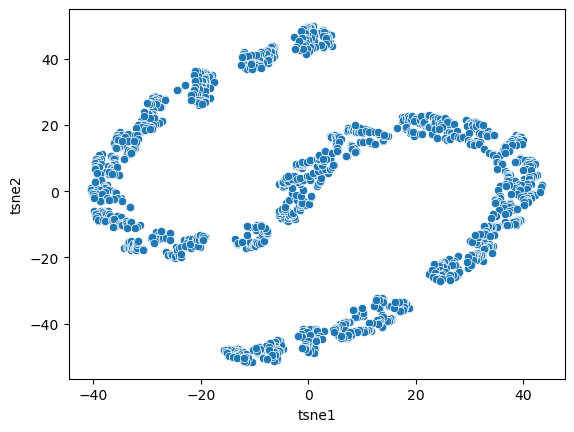

In [29]:
X_embedded = TSNE(n_components=2, init = 'random', learning_rate='auto').fit_transform(df_features.values)

X_embedded

df_tsne = pd.DataFrame(X_embedded,columns=['tsne1','tsne2'])

df_tsne['target_5yrs'] = df_dados['target_5yrs']

sns.scatterplot(data=df_tsne, x="tsne1", y="tsne2")
plt.show()

##### TREINAMENTO E AVALIANDO DO NOSSO MODELO

A função `getModel`, criada a seguir, é uma funçãO para criar e retornar um modelo de machine learning. Atualmente, ela está configurada para retornar um modelo de Regressão Logística, mas ao "descomentar" outra linha, como a do Random Forest ou Decision Tree, pode-se configurar para os outros modelos..

In [23]:
scores = cross_val_score(getModel(), df_features.values, target, cv=10)

print('Acurácia CV=',np.mean(scores))

In [41]:
def getModel():
     return LogisticRegression(max_iter = 4000)
    # return RandomForestClassifier()
    # return DecisionTreeClassifier()

O código a seguir está separando um conjunto de dados para treinamento e teste. Em seguida, treina-se um modelo de Regressão Logística. Embora "model" não venha a ser mais utilizadO no restante do projeto, faço a criação deste objeto para deixar registradoesse passo. Isso porque, ao aprender o tópico de classificação, sempre me perguntei: e se novos dados chegarem, como fazer de fato a previsão?. A resposta é o `model.predict()`.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, target)

model = getModel().fit(X_train,y_train)


O objetivo do código abaixo é fornecer uma avaliação robusta do desempenho do modelo usando cross validation, o que ajuda a ter uma ideia mais precisa de como o modelo performará em dados não vistos.







In [43]:
scores = cross_val_score(getModel(), df_features.values, target, cv=10)

print('Acurácia CV=',np.mean(scores))

Acurácia CV= 0.7074626865671643


##### VISUALIZANDO A MATRIZ DE CONFUSÃO

A matriz de confusão é uma ferramenta útil para avaliar o desempenho de um modelo de classificação, fornecendo informações como o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Isso pode ser usado para calcular várias métricas de desempenho, como precisão, recall, etc.






In [44]:
y_pred = cross_val_predict(getModel(), df_features.values, target, cv=10)

cm = confusion_matrix(target,y_pred)

cm

array([[266, 243],
       [149, 682]])

Plotando de maneira mais agradável aos olhos:

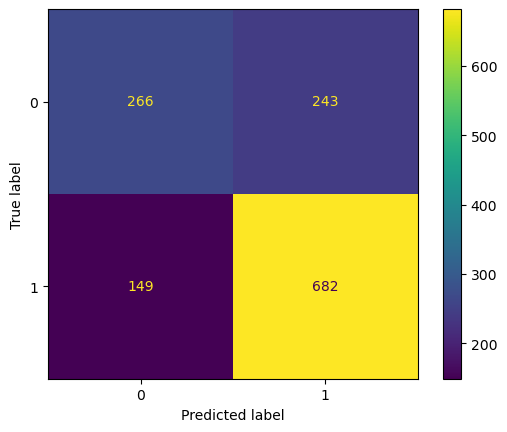

In [28]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_disp.plot()

plt.show()